In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn-white')
from datetime import datetime
print(datetime.now())
from dapc import feed as f

2022-03-09 09:05:54.842542


In [2]:
def getTs():
    today = datetime.today()
    timestamp = '{0}{1:02d}{2:02d}-{3:02d}{4:02d}'.format(today.year, today.month, today.day, today.hour, today.minute)
    return timestamp

In [3]:
def fetch_data(pair, tf='M5', count=100, forcedownload=False):
    filename=f'./data/{pair}_{tf}.pkl'
    if forcedownload or (not os.path.exists(filename)):
        df=f.getPriceHistory(pair, count, tf)
        df.to_pickle(filename)        
    else:
        df=pd.read_pickle(filename)        
    return df   

In [4]:
def plotlinreg(data, deg=1):
    x = np.arange(len(data))
    y = list(data.values)
    z = np.polyfit(x, y ,deg)
    return x, y, z

In [5]:
def add_subplot(i,j, pair, count, tf, deg=1, zigzag=False, forcedownload=False, axs=None):
    df=fetch_data(pair, tf, count, forcedownload)
    x,y,z=plotlinreg(df.C, deg) 
    axs[i, j].get_yaxis().get_major_formatter().set_useOffset(False)
    axs[i, j].get_yaxis().get_major_formatter().set_scientific(False)
    axs[i, j].plot(x, y)
    axs[i, j].plot(x, np.polyval(z, x), 'b')
    axs[i, j].plot(x, np.polyval(z, x) - df.C.std(), 'k--')
    axs[i, j].plot(x, np.polyval(z, x) + df.C.std(), 'k--')
    axs[i,j].grid(which='major', axis='both', color='grey', ls='--', lw=.2)
    if zigzag:
        order = 10
        arghighs = list(argrelextrema(df.C.values, np.greater, order =order)[0])
        arglows = list(argrelextrema(df.C.values, np.less, order =order)[0])
        axs[i, j].scatter(arghighs, df.C.values[arghighs], c='r', marker ='o')
        axs[i, j].scatter(arglows, df.C.values[arglows], c='g', marker = 'o');
        extremes = arghighs + arglows
        extremes.sort()
        axs[i, j].plot(extremes[-4:], df.C.values[extremes[-4:]], lw=1, ls='--')
    axs[i, j].set_title(f'{pair}, {tf}\n {z[0]:6f}')

In [6]:
pairs = ['USD_JPY', 'GBP_USD', 'AUD_USD', 'NZD_USD', 'EUR_USD', 'USD_CAD', 'USD_CHF']
yen_pairs = ['USD_JPY', 'GBP_JPY', 'AUD_JPY', 'NZD_JPY', 'EUR_JPY', 'CAD_JPY', 'CHF_JPY']
eur_pairs = ['EUR_USD', 'EUR_GBP', 'EUR_AUD', 'EUR_NZD', 'EUR_JPY', 'EUR_CAD', 'EUR_CHF']
tfs = ['M5', 'M15', 'H1', 'H4', 'D', 'W']

In [7]:
def generate_chart(pairs, tfs, deg=1, forcedl=False, saveFig=False):
    fig, axs = plt.subplots(len(tfs), len(pairs), figsize=(len(pairs)*2.9,len(tfs)*2))
    n = 100
    for r, t in zip(range(0,len(tfs)), tfs):
        for c, p in zip(range(0, len(pairs)), pairs):
            add_subplot(r,c,p,n,t,deg=deg, forcedownload=forcedl, axs=axs)

    stitle = f'Multitimeframe overview last 100 candles \n created: {getTs()}'
    plt.suptitle(stitle, fontsize=12)        
    plt.tight_layout()
    if saveFig:
        plt.savefig(f'{getTs()}_lr_charts.png')

Wall time: 11 s


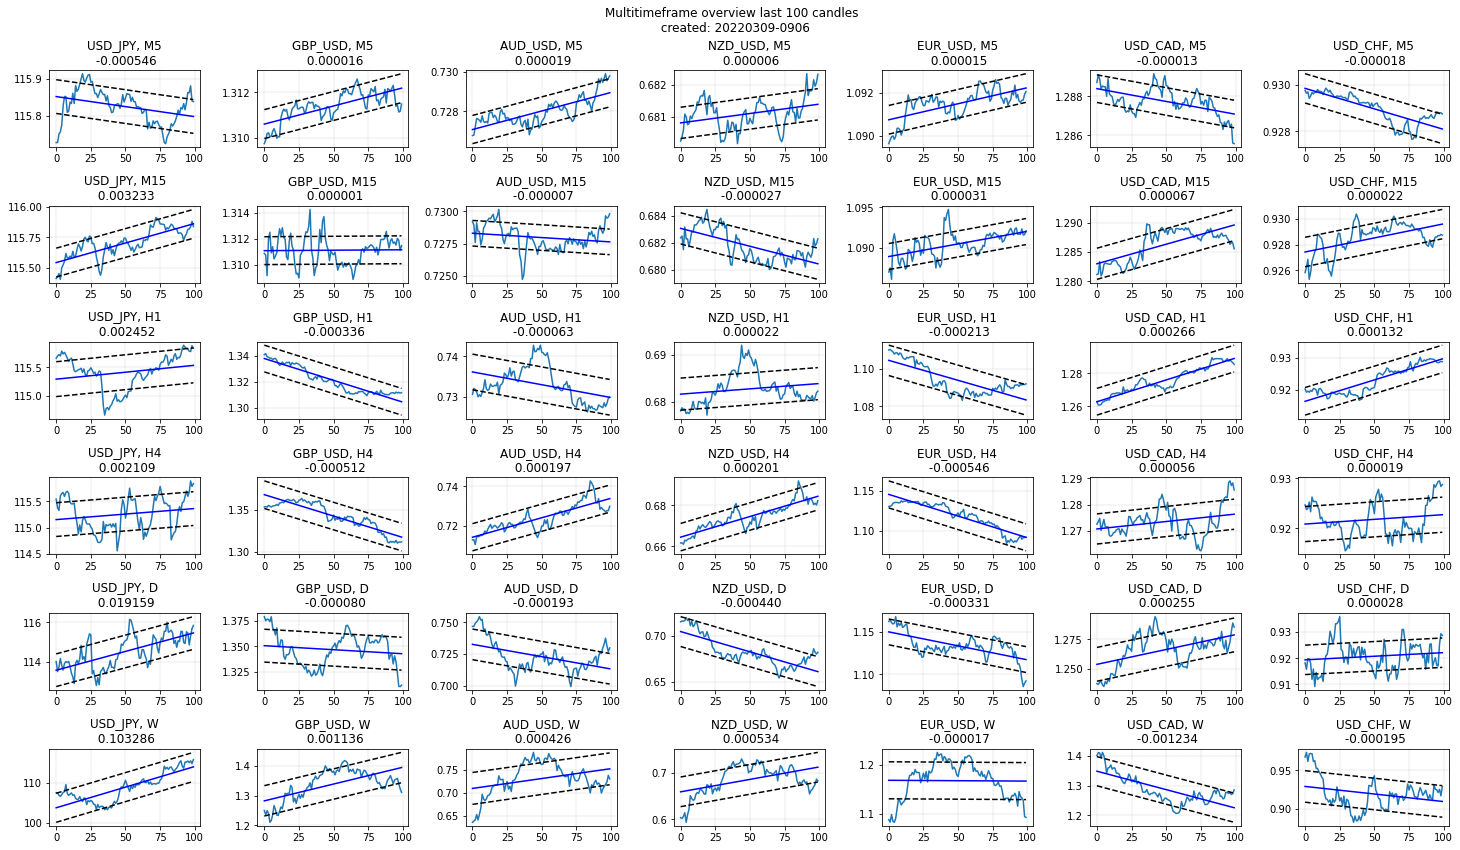

In [8]:
%%time
generate_chart(pairs, tfs, deg=1, forcedl=True, saveFig=True)

In [25]:
# DataBook
df = fetch_data('EUR_USD', 'M5')
df

,Complete,Volume,O,H,L,C
Time,,,,,,
2021-10-13 03:40:00,True,47,1.15529,1.15532,1.15523,1.15527
2021-10-13 03:45:00,True,46,1.15528,1.15529,1.15519,1.15525
2021-10-13 03:50:00,True,37,1.15524,1.15525,1.15511,1.15512
2021-10-13 03:55:00,True,48,1.15510,1.15515,1.15508,1.15514
2021-10-13 04:00:00,True,54,1.15516,1.15520,1.15514,1.15518
...,...,...,...,...,...,...
2021-10-13 11:35:00,True,479,1.15614,1.15624,1.15603,1.15621
2021-10-13 11:40:00,True,374,1.15622,1.15642,1.15619,1.15637
2021-10-13 11:45:00,True,407,1.15636,1.15644,1.15619,1.15624


In [11]:
df=fetch_data('EUR_USD')

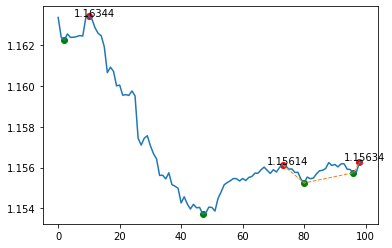

In [12]:
from  scipy.signal import argrelextrema, argrelmax, argrelmin, find_peaks
plt.plot(df.C.values)

order = 10
arghighs = list(argrelextrema(df.C.values, np.greater, order =order)[0])
arglows = list(argrelextrema(df.C.values, np.less, order =order)[0])

plt.scatter(arghighs, df.C.values[arghighs], c='r', marker ='o')
plt.scatter(arglows, df.C.values[arglows], c='g', marker = 'o');

extremes = arghighs + arglows
extremes.sort()
lines = plt.plot(extremes[-4:], df.C.values[extremes[-4:]], lw=1, ls='--')

# extremes = arghighs + arglows
# extremes.sort()
# lines = plt.plot(extremes, df.C.values[extremes])

for i in arghighs:
    t = plt.text(x=i-5, y=df.H[i], s=df.H[i])

# # linear regression
# x = extremes[-6:]
# y = list(df.C.values[extremes[-6:]])
# z = np.polyfit(x, y ,1)    
# plt.plot(x, np.polyval(z, x), 'b');

In [13]:
x = np.arange(len(df))
y = list(df.C.values)
z=np.polyfit(x, y ,1)

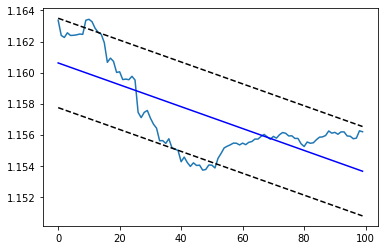

In [14]:
plt.plot(x, y)
plt.plot(x, np.polyval(z, x), 'b')
plt.plot(x, np.polyval(z, x) - df.C.std(), 'k--')
plt.plot(x, np.polyval(z, x) + df.C.std(), 'k--');

In [15]:
def add_linreg_subplot(i, j, df, deg):
    x = np.arange(len(df))
    y = list(df.C.values)
    z=np.polyfit(x, y ,deg)
    axs[i, j].plot(x, y)
    axs[i, j].plot(x, np.polyval(z, x), 'b', lw=1)
    axs[i, j].plot(x, np.polyval(z, x) - df.C.std(), 'k--', lw=.5)
    axs[i, j].plot(x, np.polyval(z, x) + df.C.std(), 'k--', lw=.5)
    axs[i, j].set_title(deg)

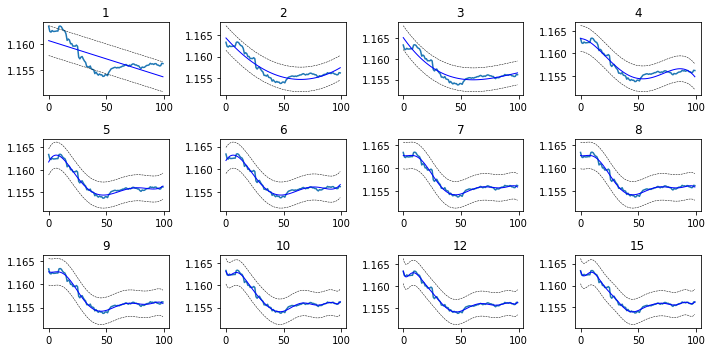

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(10,5))
add_linreg_subplot(0,0,df, deg=1)
add_linreg_subplot(0,1,df, deg=2)
add_linreg_subplot(0,2,df, deg=3)
add_linreg_subplot(0,3,df, deg=4)

add_linreg_subplot(1,0,df, deg=5)
add_linreg_subplot(1,1,df, deg=6)
add_linreg_subplot(1,2,df, deg=7)
add_linreg_subplot(1,3,df, deg=8)

add_linreg_subplot(2,0,df, deg=9)
add_linreg_subplot(2,1,df, deg=10)
add_linreg_subplot(2,2,df, deg=12)
add_linreg_subplot(2,3,df, deg=15)
plt.tight_layout()

# trading decision

In [17]:
df.C.values[:-10]

array([1.16337, 1.16239, 1.16226, 1.16256, 1.16239, 1.1624 , 1.16243,
       1.16248, 1.16246, 1.16337, 1.16343, 1.16328, 1.16286, 1.16259,
       1.16247, 1.16193, 1.16066, 1.16093, 1.16072, 1.16001, 1.16005,
       1.15955, 1.15958, 1.15954, 1.15976, 1.15952, 1.15744, 1.1571 ,
       1.15744, 1.15756, 1.15707, 1.15668, 1.15642, 1.15561, 1.15562,
       1.15544, 1.15574, 1.15516, 1.15508, 1.15498, 1.15426, 1.15456,
       1.15421, 1.15396, 1.15419, 1.15402, 1.15404, 1.15372, 1.15376,
       1.15405, 1.15404, 1.15386, 1.15448, 1.1548 , 1.15515, 1.15526,
       1.15535, 1.15546, 1.15545, 1.15534, 1.15546, 1.15536, 1.15551,
       1.15556, 1.15572, 1.15572, 1.15589, 1.15602, 1.15586, 1.15571,
       1.15589, 1.15578, 1.156  , 1.15614, 1.15609, 1.15592, 1.15593,
       1.15576, 1.15576, 1.15542, 1.15524, 1.15553, 1.15545, 1.15548,
       1.15568, 1.15584, 1.15586, 1.15595, 1.15624, 1.1561 ])

In [18]:
df = fetch_data('EUR_USD', tf='M15')
x = np.arange(len(df[:-20]))
y = list(df.C.values[:-20])
z=np.polyfit(x, y ,1)
print(z)
np.polyval(z, x)

[-1.17020159e-04  1.17037505e+00]


array([1.17037505, 1.17025803, 1.17014101, 1.17002399, 1.16990697,
       1.16978995, 1.16967293, 1.16955591, 1.16943889, 1.16932186,
       1.16920484, 1.16908782, 1.1689708 , 1.16885378, 1.16873676,
       1.16861974, 1.16850272, 1.1683857 , 1.16826868, 1.16815166,
       1.16803464, 1.16791762, 1.1678006 , 1.16768358, 1.16756656,
       1.16744954, 1.16733252, 1.1672155 , 1.16709848, 1.16698146,
       1.16686444, 1.16674742, 1.1666304 , 1.16651338, 1.16639636,
       1.16627934, 1.16616232, 1.1660453 , 1.16592828, 1.16581126,
       1.16569424, 1.16557722, 1.1654602 , 1.16534318, 1.16522616,
       1.16510914, 1.16499212, 1.1648751 , 1.16475808, 1.16464106,
       1.16452404, 1.16440702, 1.16429   , 1.16417298, 1.16405596,
       1.16393894, 1.16382192, 1.1637049 , 1.16358788, 1.16347086,
       1.16335384, 1.16323682, 1.1631198 , 1.16300278, 1.16288576,
       1.16276874, 1.16265172, 1.1625347 , 1.16241768, 1.16230066,
       1.16218364, 1.16206661, 1.16194959, 1.16183257, 1.16171

In [19]:
df = fetch_data('EUR_USD', tf='M5')

# x = np.arange(len(df[:-20]))
# y = list(df.C.values[:-20])
x = np.arange(len(df))
y = list(df.C.values)
z=np.polyfit(x, y ,1)
print(z)
x = np.arange(len(df))

df['ML']   = np.polyval(z, x)
df['UML']  = np.polyval(z, x) + df.C.std()
df['LML']  = np.polyval(z, x) - df.C.std()
df['ML_slope'] = int(np.sign(z[0]))

# ár a std-n kívül van
df['C_UML_pos'] = np.where(df.C>df.UML,1,0)  
df['C_LML_pos'] = np.where(df.C<df.LML,-1,0)

# ár az ML-hez képest
df['C_ML_pos'] = np.sign(df.C-df.ML)

# trendirányba és ellentétes oldalon:
def is_trade(row):
    if row['ML_slope'] > 0:
        if row['C_LML_pos']<0:
            return 1
        
    if row['ML_slope']<0:
        if row['C_UML_pos']>0:
                return 1    
    return 0

df['lows']      = np.sign(df.L-df.L.shift(1))
df['highs']     = np.sign(df.H-df.H.shift(1))
df['hilo']      = np.sign(df.lows+df.highs)
df['mom']       = df.C.diff(10)
df['mom_pos']   = np.sign(df.mom)
df['mom_slope'] = np.sign(df.mom.diff(1))
df['signal']    = np.where((df.hilo+df.mom_pos+df.mom_slope==3),1,np.where(((df.hilo+df.mom_pos+df.mom_slope== -3)),-1,0))


df['signal_ml']=df.apply(is_trade, axis=1)

df[df.columns[3:]].tail()

[-7.04043204e-05  1.16061981e+00]


,H,L,C,ML,UML,LML,ML_slope,C_UML_pos,C_LML_pos,C_ML_pos,lows,highs,hilo,mom,mom_pos,mom_slope,signal,signal_ml
Time,,,,,,,,,,,,,,,,,,
2021-10-29 20:35:00,1.15595,1.15584,1.15590,1.153931,1.156809,1.151054,-1,0,0,1.0,-1.0,-1.0,-1.0,0.00006,1.0,-1.0,0,0
2021-10-29 20:40:00,1.15599,1.15572,1.15574,1.153861,1.156739,1.150983,-1,0,0,1.0,-1.0,1.0,0.0,-0.00012,-1.0,-1.0,0,0
2021-10-29 20:45:00,1.15584,1.15562,1.15578,1.153791,1.156668,1.150913,-1,0,0,1.0,-1.0,-1.0,-1.0,-0.00017,-1.0,-1.0,-1,0
2021-10-29 20:50:00,1.15634,1.15578,1.15625,1.153720,1.156598,1.150842,-1,0,0,1.0,1.0,1.0,1.0,0.00001,1.0,1.0,1,0
2021-10-29 20:55:00,1.15653,1.15604,1.15619,1.153650,1.156528,1.150772,-1,0,0,1.0,1.0,1.0,1.0,0.00009,1.0,1.0,1,0


# SETTINGS: TimeFrame Statistics

In [20]:
tf='M5'

settings={}
for p in yen_pairs:
    df=pd.read_pickle(f'./data/{p}_{tf}.pkl')
    df['mom']       = df.C.diff(10)
    d= dict(
        max_mom = df.mom.max().round(4),
        min_mom = df.mom.min().round(4),
        avg_mom = df.mom.mean().round(4)
    )
    settings[p]=d

settings

{'USD_JPY': {'max_mom': 0.282, 'min_mom': -0.149, 'avg_mom': 0.0101},
 'GBP_JPY': {'max_mom': 0.252, 'min_mom': -0.19, 'avg_mom': 0.021},
 'AUD_JPY': {'max_mom': 0.173, 'min_mom': -0.101, 'avg_mom': 0.0286},
 'NZD_JPY': {'max_mom': 0.148, 'min_mom': -0.102, 'avg_mom': 0.0138},
 'EUR_JPY': {'max_mom': 0.19, 'min_mom': -0.126, 'avg_mom': 0.0226},
 'CAD_JPY': {'max_mom': 0.13, 'min_mom': -0.12, 'avg_mom': 0.019},
 'CHF_JPY': {'max_mom': 0.139, 'min_mom': -0.05, 'avg_mom': 0.0428}}

In [21]:
settings.get('EUR_NZD')


In [76]:
df['mom']       = df.C.diff(10)
df.mom.describe().round(4).to_dict()


{'count': 90.0,
 'mean': 0.019,
 'std': 0.0494,
 'min': -0.12,
 '25%': -0.015,
 '50%': 0.011,
 '75%': 0.0538,
 'max': 0.13}

{'EURUSD': {'max_mom': 0.0015, 'min_mom': -0.0009, 'avg_mom': 0.0001}}

In [88]:

df[df.signal_ml != 0].tail()

,Complete,Volume,O,H,L,C,ML,UML,LML,ML_slope,C_UML_pos,C_LML_pos,C_ML_pos,lows_sign,highs_sign,signal_ml
Time,,,,,,,,,,,,,,,,
2021-10-12 06:45:00,True,846,1.15674,1.15702,1.15667,1.15684,1.155386,1.156266,1.154506,-1,1,0,1.0,1.0,1.0,1
2021-10-12 08:15:00,True,834,1.15594,1.15628,1.15568,1.15626,1.155286,1.156166,1.154406,-1,1,0,1.0,1.0,1.0,1
2021-10-12 08:30:00,True,784,1.15625,1.15650,1.15616,1.15638,1.155269,1.156149,1.154389,-1,1,0,1.0,1.0,1.0,1
2021-10-12 08:45:00,True,659,1.15640,1.15650,1.15613,1.15619,1.155252,1.156132,1.154372,-1,1,0,1.0,-1.0,0.0,1
2021-10-12 09:00:00,True,888,1.15622,1.15654,1.15592,1.15651,1.155236,1.156116,1.154356,-1,1,0,1.0,-1.0,1.0,1


<AxesSubplot:label='f2944790-9f95-4621-98da-309be19a3bda'>

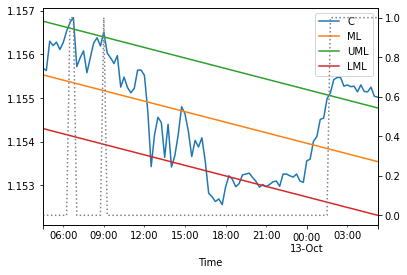

In [15]:
cols=['C', 'ML', 'UML', 'LML']
df[cols].plot();
df.signal_ml.plot(secondary_y=True, c='grey', ls=':');

<AxesSubplot:>

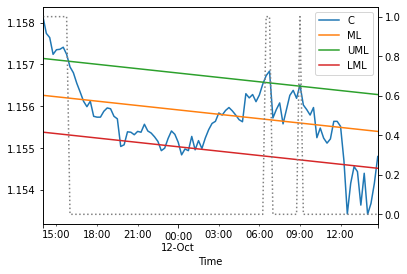

In [103]:
cols=['C', 'ML', 'UML', 'LML']
df[cols].plot();
df.signal_ml.plot(secondary_y=True, c='grey', ls=':')

In [34]:
np.polyfit(x, y ,1)

array([-2.58443444e-05,  1.15645450e+00])

In [23]:
df2 = df.copy()
df2=df2.reset_index()

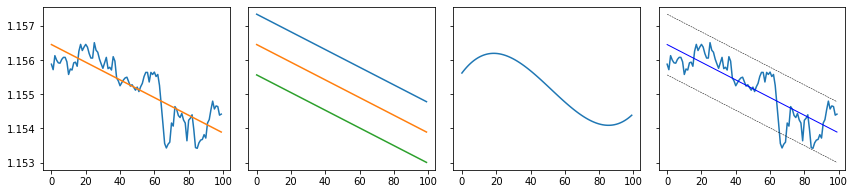

In [32]:
cols = ['C', 'ML', 'UML', 'LML']
fig, axs = plt.subplots(1,4, figsize=(12,2.8), sharey=True)
axs[0].plot(df2[['C', 'ML']]);
axs[1].plot(df2[['UML','ML', 'LML']])
axs[2].plot(df2.ML3)

axs[3].plot(df2.C)
axs[3].plot(df2.ML, 'b', lw=1)
axs[3].plot(df2.UML, 'k--', lw=.5)
axs[3].plot(df2.LML, 'k--', lw=.5)

plt.tight_layout()

<AxesSubplot:xlabel='Time'>

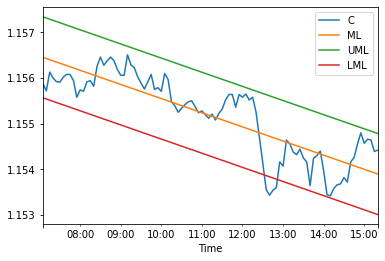

In [29]:
cols=['C', 'ML', 'UML', 'LML']
df[cols].plot();

## Vectorization

In [3]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [7]:
np.mean(a, axis=1)

array([ 1.,  4.,  7., 10.])

# Rolling linreg

In [8]:
df = fetch_data('EUR_USD', count=1000, tf='M5', forcedownload=True)

In [9]:
def get_linreg_slope(v):
    x = np.arange(len(v))
    y = list(v.values)
    slope, ic=np.polyfit(x, y ,1)
    return slope

In [13]:
df['linreg_50']=df.C.rolling(50).apply(get_linreg_slope)
df['linreg_100']=df.C.rolling(100).apply(get_linreg_slope)
df['linreg_200']=df.C.rolling(200).apply(get_linreg_slope)
df= df.reset_index()

In [ ]:
df[df.columns[5:]].plot(subplots=True, layout=(2,2));

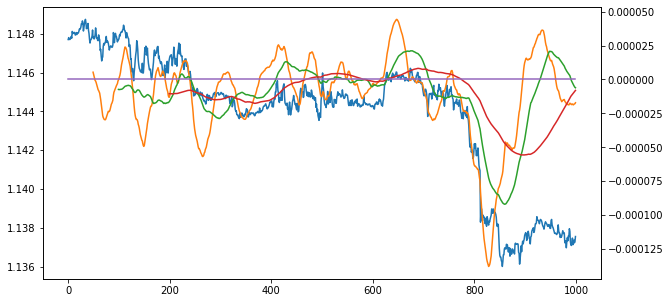

In [15]:
ax=df.C.plot(figsize=(10,5))
df['linreg_50'].plot(secondary_y=True)
df['linreg_100'].plot(secondary_y=True)
df['linreg_200'].plot(secondary_y=True);
df['hline'] = 0
df['hline'].plot(secondary_y=True);

# Currency index

In [22]:
ccy = ['EUR', 'GBP', 'USD', 'JPY', 'CAD', 'CHF', 'AUD', 'NZD']
len(ccy)

8